In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("synthetic_fraud_dataset.csv")

In [5]:
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [73]:
data['Authentication_Method'].unique()

array(['Biometric', 'Password', 'OTP', 'PIN'], dtype=object)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']] = encoder.fit_transform(data[['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']])

In [7]:
data = data.drop(['Timestamp', 'Transaction_ID', 'User_ID'], axis = 1)
data

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3.0,93213.17,0.0,3.0,4.0,0,0,7,437.63,3,0.0,65,883.17,0.0,0.8494,0,0
1,1.19,1.0,75725.25,1.0,2.0,0.0,0,0,13,478.76,4,2.0,186,2203.36,3.0,0.0959,0,1
2,28.96,2.0,1588.96,2.0,1.0,3.0,0,0,14,50.01,4,3.0,226,1909.29,0.0,0.8400,0,1
3,254.32,0.0,76807.20,2.0,2.0,0.0,0,0,8,182.48,4,3.0,76,1311.86,1.0,0.7935,0,1
4,31.28,3.0,92354.66,1.0,1.0,1.0,0,1,14,328.69,4,2.0,140,966.98,3.0,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,2.0,76960.11,1.0,4.0,0.0,0,0,2,389.00,3,0.0,98,1537.54,2.0,0.1493,1,0
49996,126.15,3.0,28791.75,1.0,4.0,0.0,0,0,13,434.95,4,3.0,93,2555.72,0.0,0.3653,0,1
49997,72.02,2.0,29916.41,0.0,1.0,0.0,0,1,1,369.15,2,3.0,114,4686.59,0.0,0.5195,0,0
49998,64.89,1.0,67895.67,1.0,4.0,1.0,0,0,13,242.29,4,1.0,72,4886.92,0.0,0.7063,0,1


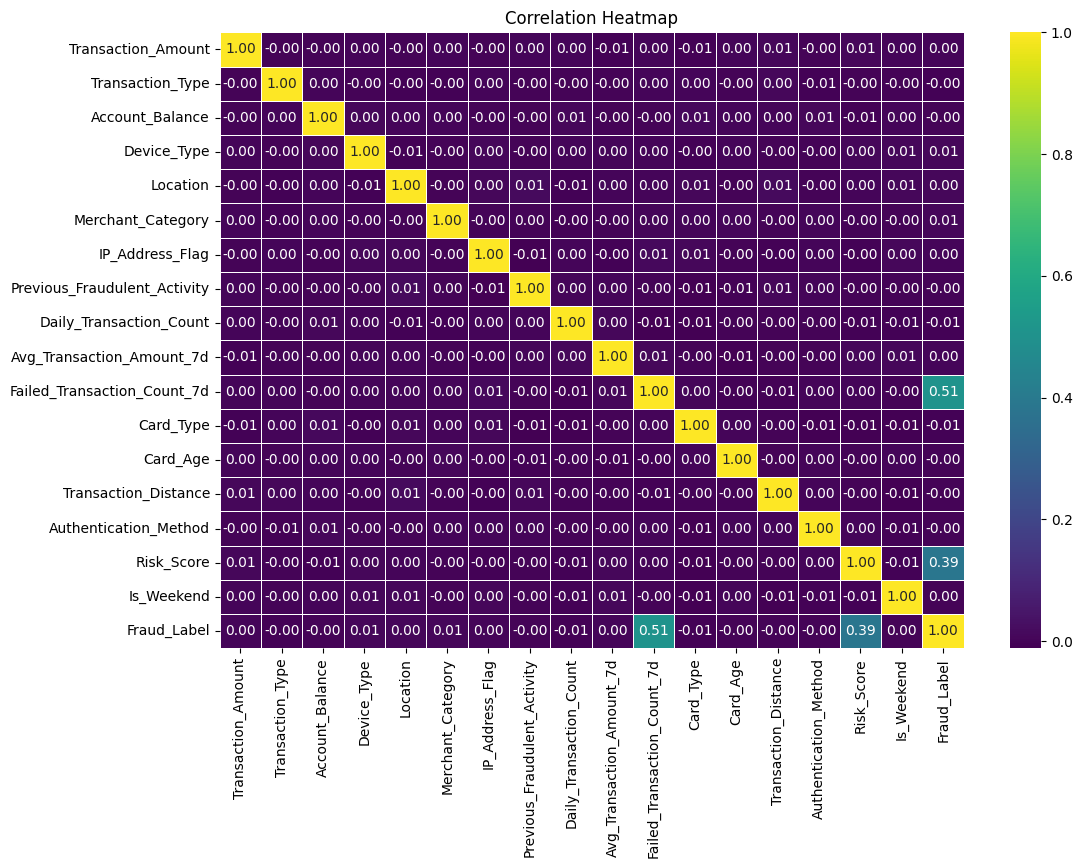

In [8]:
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
y = data['Fraud_Label']
X = data.drop(['Fraud_Label'], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm = LinearSVC()

In [12]:
#train the model
svm.fit(X_train, y_train)

LinearSVC()

In [13]:
# Predict
y_pred = svm.predict(X_test)

In [14]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6765
           1       0.73      0.63      0.68      3235

    accuracy                           0.80     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.80      0.80      0.80     10000



In [35]:
svm2 = LinearSVC(C = 3)
svm2.fit(X_train, y_train)
y_pred = svm2.predict(X_test)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8056
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6765
           1       0.73      0.63      0.68      3235

    accuracy                           0.81     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.80      0.81      0.80     10000



In [36]:
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression Model
model = LogisticRegression(max_iter=1000, multi_class='ovr')

# Train Model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\Vikas\.conda\envs\e2e\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7912
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6765
           1       0.70      0.63      0.66      3235

    accuracy                           0.79     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.79      0.79      0.79     10000



c:\Users\Vikas\.conda\envs\e2e\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# XGBoost Model
xgBoost = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgBoost.fit(X_train, y_train)

# Predictions
y_pred = xgBoost.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9991
Confusion Matrix:
 [[6760    5]
 [   4 3231]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6765
           1       1.00      1.00      1.00      3235

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
#pickling the model file for deployment
import pickle

In [43]:
pickle.dump(xgBoost, open('xgmodel.pkl', 'wb'))

In [44]:
pickled_model = pickle.load(open('xgmodel.pkl', 'rb'))